# The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r'F:\ICTAK\Case Study 2 Regression\car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [10]:
data .isna().sum()

Year     0
Price    0
dtype: int64

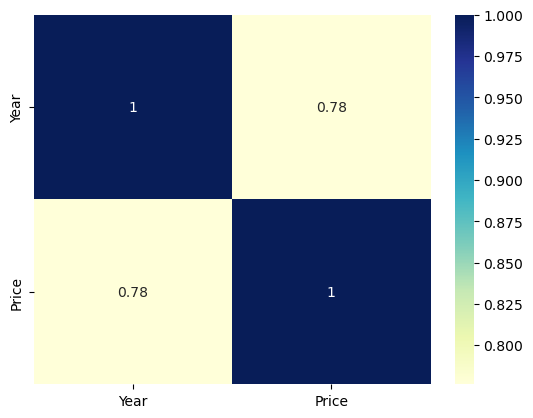

In [4]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot= True,cmap='YlGnBu')
plt.show()

In [5]:
# Prepare the data
x = data['Year'].values.reshape(-1, 1)
y = data['Price'].values

# Reshape the arrays
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split (x,y,test_size=0.2,random_state=42) 

# Fit the linear regression model
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
model=lin_regressor.fit(x_train,y_train)

# Predict the prices based on the model
predictions=model.predict(x_test)

#Calculate the mean_squared_error and R-squared score
from sklearn.metrics import mean_squared_error,r2_score
print('MSE=', mean_squared_error(y_test,predictions))
print('R squared value',r2_score(y_test,predictions))

MSE= 4326906256.829671
R squared value 0.36759313425902185


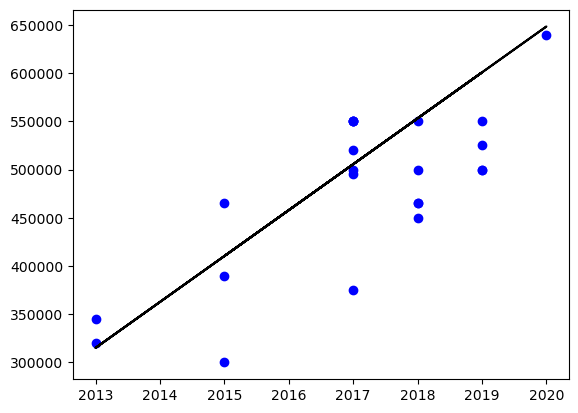

In [11]:
y_pred =model.predict(x_test)
plt.scatter (x_test,y_test,color ='b')
plt.plot(x_test,y_pred,color ='k')
plt.show()
# Data Scatter of Predicted Values

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = mean_squared_error(y_test,predictions,squared= False)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)

MAE: 53534.77957001264
MSE: 4326906256.829671
RMSE: 65779.22359552195


In [6]:
# Predict the price for a 2022 model
year_2022 = np.array([[2022]])
predicted_price_2022 = model.predict(year_2022)
print("Predicted price for a 2022 model:", predicted_price_2022)

Predicted price for a 2022 model: [743601.61594504]


# Lasso Regression

In [14]:
from sklearn.linear_model import Lasso
lasso_regressor = Lasso(alpha=0.1)  # Set the alpha regularization parameter
lasso_regressor.fit(x_train, y_train)

Lasso(alpha=0.1)

In [8]:
predictions2 = lasso_regressor.predict(x_test)

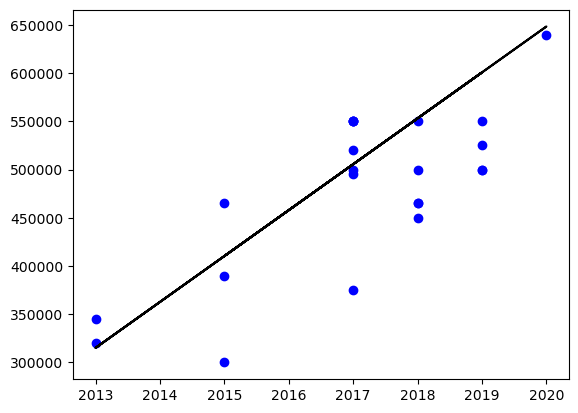

In [16]:
y_pred_lasso =lasso_regressor.predict(x_test)
plt.scatter (x_test,y_test,color ='b')
plt.plot(x_test,y_pred_lasso,color ='k')
plt.show()
# Data Scatter of Predicted Values

In [17]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE=', mean_squared_error(y_test,predictions2))
print('R squared value',r2_score(y_test,predictions2))

MSE= 4326901608.19506
R squared value 0.36759381368868127
